In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [32]:
train = pd.read_csv("/Kaggle/Titanic/train.csv")
test = pd.read_csv("/Kaggle/Titanic/test.csv")

In [33]:
train.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [34]:
test.head(5)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [35]:
def bar_chart(feature):
    alive = train[train['Survived']==1][feature].value_counts()
    dead = train[train['Survived']==0][feature].value_counts()
    df = pd.DataFrame([alive,dead])
    df.index = ['ALIVE','DEAD']
    df.plot(kind='bar',stacked=True,figsize=(10,5))

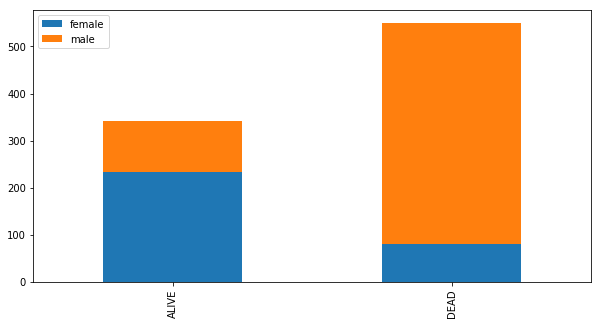

In [36]:
bar_chart('Sex')

In [37]:
total_data = [train,test]

In [38]:
sex_mapping = {"female":0,"male":1}
for dataset in total_data:
    dataset['Sex'] = dataset['Sex'].map(sex_mapping)

In [39]:
for dataset in total_data:
    dataset['Title'] = dataset['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)

In [40]:
title_mapping = {"Mr": 0, "Miss": 1, "Mrs": 2, 
                 "Master": 3, "Dr": 3, "Rev": 3, "Col": 3, "Major": 3, "Mlle": 3,"Countess": 3,
                 "Ms": 3, "Lady": 3, "Jonkheer": 3, "Don": 3, "Dona" : 3, "Mme": 3,"Capt": 3,"Sir": 3 }
for dataset in total_data:
    dataset['Title'] = dataset['Title'].map(title_mapping)

In [41]:
train.drop('Name',axis=1,inplace=True)
test.drop('Name',axis=1,inplace=True)

In [42]:
train["Age"].fillna(train.groupby("Title")["Age"].transform("median"), inplace=True)
test["Age"].fillna(test.groupby("Title")["Age"].transform("median"), inplace=True)

In [43]:
train.head(10)
train.groupby("Title")["Age"].transform("median")

0      30.0
1      35.0
2      21.0
3      35.0
4      30.0
5      30.0
6      30.0
7       9.0
8      35.0
9      35.0
10     21.0
11     21.0
12     30.0
13     30.0
14     21.0
15     35.0
16      9.0
17     30.0
18     35.0
19     35.0
20     30.0
21     30.0
22     21.0
23     30.0
24     21.0
25     35.0
26     30.0
27     30.0
28     21.0
29     30.0
       ... 
861    30.0
862    35.0
863    21.0
864    30.0
865    35.0
866    21.0
867    30.0
868    30.0
869     9.0
870    30.0
871    35.0
872    30.0
873    30.0
874    35.0
875    21.0
876    30.0
877    30.0
878    30.0
879    35.0
880    35.0
881    30.0
882    21.0
883    30.0
884    30.0
885    35.0
886     9.0
887    21.0
888    21.0
889    30.0
890    30.0
Name: Age, Length: 891, dtype: float64

In [44]:
for dataset in total_data:
    dataset.loc[dataset['Age']<=16,'Age'] = 0
    dataset.loc[(dataset['Age']>16) & (dataset['Age']<=26),'Age'] = 1
    dataset.loc[(dataset['Age']>26) & (dataset['Age']<=36),'Age'] = 2
    dataset.loc[(dataset['Age']>36) & (dataset['Age']<=62),'Age'] = 3
    dataset.loc[dataset['Age']>62,'Age'] = 4

In [45]:
for dataset in total_data:
    dataset['Embarked'] = dataset['Embarked'].fillna('S')

In [46]:
embark_mapping = {"S":0,"Q":1,"C":2}
for dataset in total_data:
    dataset['Embarked'] = dataset['Embarked'].map(embark_mapping)

In [47]:
train["Fare"].fillna(train.groupby("Pclass")["Fare"].transform("median"), inplace=True)
test["Fare"].fillna(test.groupby("Pclass")["Fare"].transform("median"), inplace=True)
train.head(10)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,1,1.0,1,0,A/5 21171,7.2500,NaN,0,0
1,2,1,1,0,3.0,1,0,PC 17599,71.2833,C85,2,2
2,3,1,3,0,1.0,0,0,STON/O2. 3101282,7.9250,NaN,0,1
3,4,1,1,0,2.0,1,0,113803,53.1000,C123,0,2
4,5,0,3,1,2.0,0,0,373450,8.0500,NaN,0,0
5,6,0,3,1,2.0,0,0,330877,8.4583,NaN,1,0
6,7,0,1,1,3.0,0,0,17463,51.8625,E46,0,0
7,8,0,3,1,0.0,3,1,349909,21.0750,NaN,0,3
8,9,1,3,0,2.0,0,2,347742,11.1333,NaN,0,2
9,10,1,2,0,0.0,1,0,237736,30.0708,NaN,2,2


In [242]:
for dataset in total_data:
    dataset.loc[dataset['Fare']<=17,'Fare'] = 0
    dataset.loc[(dataset['Fare']>17)&dataset['Fare']<=30,'Fare'] = 1
    dataset.loc[(dataset['Fare']>30)&dataset['Fare']<=100,'Fare'] = 2
    dataset.loc[dataset['Fare']>100,'Fare'] = 3

In [243]:
for dataset in total_data:
    dataset['Cabin'] = dataset['Cabin'].str[:1]

In [244]:
cabin_mapping = {"A":0,"B":0.4,"C":0.8,"D":1.2,"E":1.6,"F":2,"G":2.4,"T":2.8}
for dataset in total_data:
    dataset['Cabin'] = dataset['Cabin'].map(cabin_mapping)

In [245]:
train['Cabin'].fillna(train.groupby("Pclass")['Cabin'].transform("median"), inplace=True)
test['Cabin'].fillna(test.groupby("Pclass")['Cabin'].transform("median"), inplace=True)

In [246]:
train['FamilySize'] = 1 + train['SibSp'] + train['Parch']
test['FamilySize'] = 1 + test['SibSp'] + test['Parch']

In [247]:
fsize_mapping = {1:0,2:0.4,3:0.8,4:1.2,5:1.6,6:2,7:2.4,8:2.8,9:3.2,10:3.6,11:4}
for dataset in total_data:
    dataset['FamilySize'] = dataset['FamilySize'].map(fsize_mapping)

In [248]:
features_drop = ['Ticket', 'SibSp', 'Parch']
train = train.drop(features_drop, axis=1)
test = test.drop(features_drop, axis=1)
train = train.drop(['PassengerId'], axis=1)

In [249]:
train_data = train.drop(['Survived'], axis=1)
target = train['Survived']
train_data.shape,target.shape

((891, 8), (891,))

In [250]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
k_fold = KFold(n_splits=10,shuffle=True,random_state=0)

In [251]:
clf = RandomForestClassifier(n_estimators=1000)
scoring = 'accuracy'
score = cross_val_score(clf,train_data,target,cv=k_fold,n_jobs=-1,scoring=scoring)
print(score)

[0.8        0.79775281 0.82022472 0.78651685 0.85393258 0.79775281
 0.80898876 0.80898876 0.78651685 0.78651685]


In [252]:
round(np.mean(score)*100,2)

80.47

In [253]:
from sklearn.svm import SVC

In [255]:
clf = SVC()
scoring = 'accuracy'
score = cross_val_score(clf,train_data,target,cv=k_fold,n_jobs=1,scoring=scoring)
print(score)

[0.83333333 0.82022472 0.82022472 0.82022472 0.84269663 0.82022472
 0.83146067 0.86516854 0.83146067 0.86516854]


In [260]:
round(np.mean(score)*100,2)

83.5

In [261]:
clf = RandomForestClassifier(n_estimators=1000)
clf.fit(train_data,target)
test_data = test.drop("PassengerId",axis=1).copy()
prediction = clf.predict(test_data)

In [262]:
submission = pd.DataFrame({
    "PassengerId": test["PassengerId"],
    "Survived": prediction
})
submission.to_csv('/Kaggle/Titanic/submission.csv', index=False)

In [263]:
submission = pd.read_csv('/Kaggle/Titanic/submission.csv')
submission.head(10)

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
5,897,0
6,898,0
7,899,0
8,900,1
9,901,0
